# Wiener Process

The **Wiener process** is a fundamental continuous-time stochastic process. In fact, the terms *Wiener process* and *standard Brownian motion* are used interchangeably in many contexts.

---

## Definition

A Wiener process $W(t)$ is defined by these key properties:

- $W(0) = 0$ almost surely.
- Independent increments.
- Normally distributed increments:
  $$
  W(t) - W(s) \sim \mathcal{N}(0, t-s), \quad \text{for } t > s
  $$
- Continuous paths.

Expectation and variance:
$$
\mathbb{E}[W(t)] = 0, \quad \text{Var}(W(t)) = t
$$

---

## Importance in Quantitative Finance

- The Wiener process serves as the **stochastic driver for many financial models**.
- It is the canonical example of a **martingale** and forms the basis for stochastic differential equations (SDEs).
- The Black-Scholes model and many option pricing frameworks rely on Wiener processes.

---

## Applications

- Driving noise term for **Geometric Brownian Motion (GBM)**.
- Modeling randomness in asset returns.
- Foundation for Itô calculus.


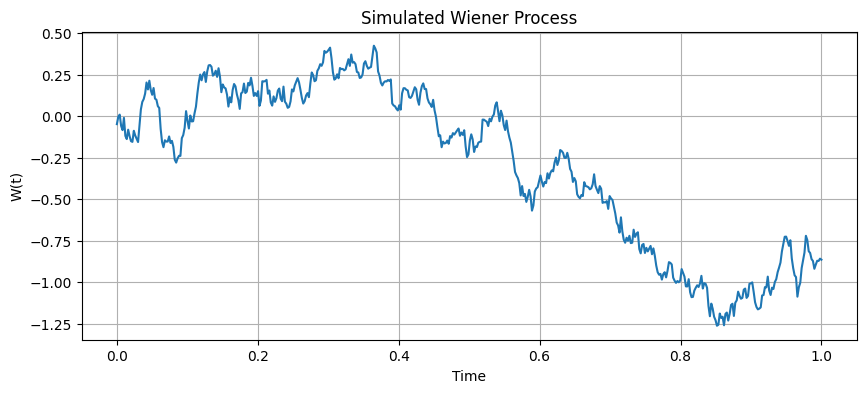

In [1]:
# Simulating and plotting a Wiener process path

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

T = 1.0  # Total time
N = 500  # Number of steps
dt = T / N
t = np.linspace(0, T, N)

# Wiener process increments
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

plt.figure(figsize=(10, 4))
plt.plot(t, W, lw=1.5)
plt.title("Simulated Wiener Process")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()


## Wiener Process as a Martingale and Quadratic Variation

The Wiener process $W(t)$ is a classic example of a martingale:
$$
\mathbb{E}[W(t) | \mathcal{F}(s)] = W(s), \quad 0 \leq s \leq t
$$

Its **quadratic variation** over $[0, T]$ is:
$$
[W](T) = \lim_{N \to \infty} \sum_{i=1}^N [W(t_i) - W(t_{i-1})]^2 = T
$$

This property underpins Itô calculus and is essential for stochastic integration.


In [2]:
# Approximate quadratic variation numerically

dt_small = T / N
increments = np.sqrt(dt_small) * np.random.randn(N)
quad_var = np.sum(increments ** 2)

print(f"Approximate quadratic variation ≈ {quad_var:.4f} (should be close to T = {T})")


Approximate quadratic variation ≈ 0.9984 (should be close to T = 1.0)


## Multidimensional Wiener Process (Correlated Processes)

A 2D Wiener process $(W_1(t), W_2(t))$ can be constructed with correlation $\rho$:
$$
\text{Corr}(dW_1, dW_2) = \rho
$$

This is useful for modeling multiple correlated assets in quantitative finance.


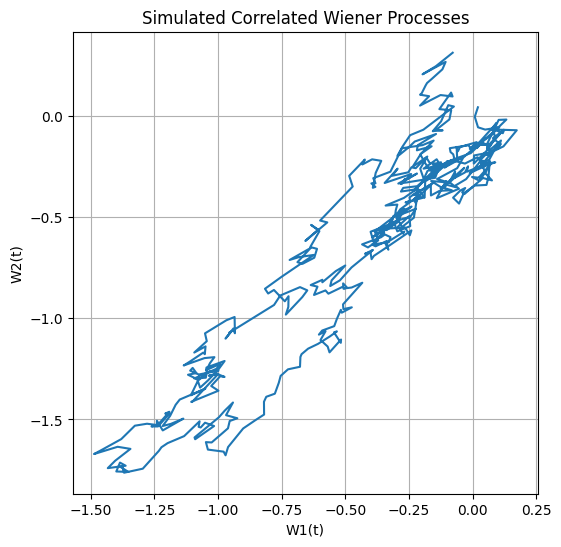

In [3]:
rho = 0.7  # correlation coefficient
mean = [0, 0]
cov = [[dt, rho * dt], [rho * dt, dt]]

W1 = []
W2 = []
w1 = 0
w2 = 0

for _ in range(N):
    dW = np.random.multivariate_normal(mean, cov)
    w1 += dW[0]
    w2 += dW[1]
    W1.append(w1)
    W2.append(w2)

plt.figure(figsize=(6, 6))
plt.plot(W1, W2)
plt.xlabel("W1(t)")
plt.ylabel("W2(t)")
plt.title("Simulated Correlated Wiener Processes")
plt.grid(True)
plt.show()


## Wiener Process with Drift and Volatility

The generalized form introduces drift $\mu$ and volatility $\sigma$:
$$
dX(t) = \mu dt + \sigma dW(t)
$$

This formulation is foundational for stochastic differential equations (SDEs) in finance.


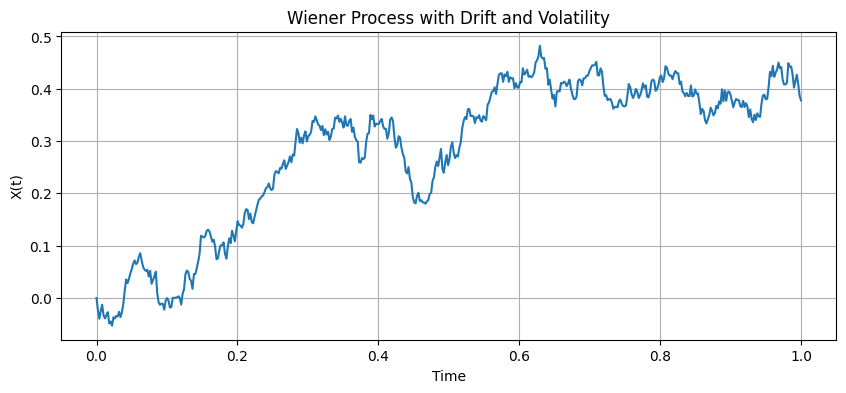

In [4]:
mu = 0.1
sigma = 0.3

X = np.zeros(N)
for i in range(1, N):
    X[i] = X[i-1] + mu * dt + sigma * np.sqrt(dt) * np.random.randn()

plt.figure(figsize=(10, 4))
plt.plot(t, X)
plt.title("Wiener Process with Drift and Volatility")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.show()


## Time-Change Property of Wiener Process

The Wiener process is self-similar:
$$
W(ct) = \sqrt{c} W(t)
$$

This scaling property reflects its fractal-like behavior.


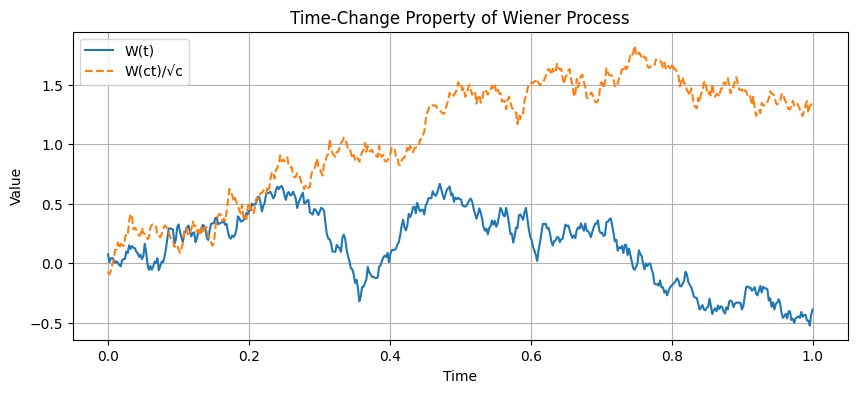

In [5]:
c = 2  # scaling factor

# Base Wiener process
W_base = np.cumsum(np.sqrt(dt) * np.random.randn(N))

# Time-scaled Wiener process
W_scaled = np.cumsum(np.sqrt(c * dt) * np.random.randn(N))

plt.figure(figsize=(10, 4))
plt.plot(t, W_base, label="W(t)")
plt.plot(t, W_scaled / np.sqrt(c), label="W(ct)/√c", linestyle="--")
plt.legend()
plt.title("Time-Change Property of Wiener Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


## Empirical Comparison: Simulated Increments vs Real Returns

We can compare simulated Wiener process increments to actual asset return increments.

Example: TSLA daily returns.


/var/folders/ry/7h2qkbms38q458j803wlq8c80000gp/T/ipykernel_1641/743873276.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", period="5y")
[*********************100%***********************]  1 of 1 completed


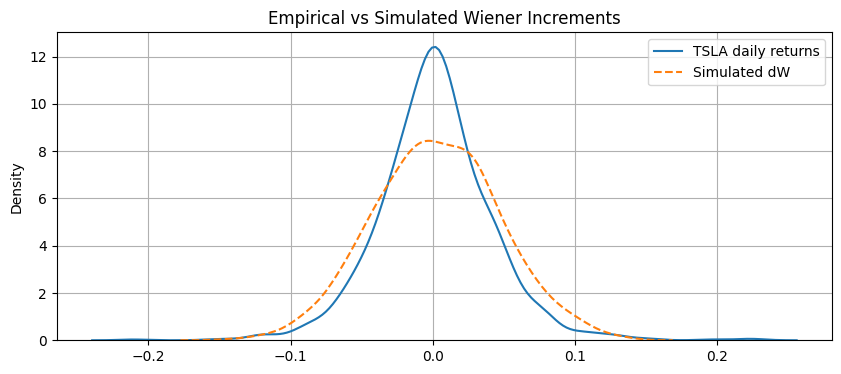

In [7]:
import yfinance as yf
from scipy.stats import norm
import seaborn as sns

tsla = yf.download("TSLA", period="5y")
returns = tsla['Close'].pct_change().dropna()

sim_increments = np.sqrt(dt) * np.random.randn(len(returns))

plt.figure(figsize=(10, 4))
sns.kdeplot(returns, label="TSLA daily returns")
sns.kdeplot(sim_increments, label="Simulated dW", linestyle="--")
plt.title("Empirical vs Simulated Wiener Increments")
plt.legend()
plt.grid(True)
plt.show()
